In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.style.use('seaborn-notebook')

In [2]:
#The Fuel of the system, DATASETS!
df1 = pd.read_csv('F:/Akshay Files/DataSets/kanpur.csv')
df0 = pd.read_csv('F:/Akshay Files/DataSets/bengaluru.csv')

In [3]:
#what does it look like
df0.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
96427,2020-01-01 19:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,23,22,74,76,0.1,1014,23,10,107,16
96428,2020-01-01 20:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,22,23,73,81,0.6,1015,22,9,106,16
96429,2020-01-01 21:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,21,25,72,86,0.8,1016,21,9,105,17
96430,2020-01-01 22:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,69,88,0.4,1016,20,10,106,16
96431,2020-01-01 23:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,66,89,0.5,1016,20,10,108,16


In [4]:
#Clean and arrange the data
new0 = df0["date_time"].str.split(" ", n = 1, expand = True) 
df0['Date'] = new0[0]
df0['Time'] = new0[1]
new1 = df1["date_time"].str.split(" ", n = 1, expand = True)
df1['Date'] = new1[0]
df1['Time'] = new1[1]

In [5]:
columns_to_keep = ['Date',
                   'Time',
                   'maxtempC']
df0 = df0[columns_to_keep]
df1 = df1[columns_to_keep]

In [6]:
#How does it look now?
df0.tail()

,Date,Time,maxtempC
96427,2020-01-01,19:00:00,26
96428,2020-01-01,20:00:00,26
96429,2020-01-01,21:00:00,26
96430,2020-01-01,22:00:00,26
96431,2020-01-01,23:00:00,26


In [7]:
df1.tail()

,Date,Time,maxtempC
96427,2020-01-01,19:00:00,15
96428,2020-01-01,20:00:00,15
96429,2020-01-01,21:00:00,15
96430,2020-01-01,22:00:00,15
96431,2020-01-01,23:00:00,15


In [8]:
#Reducing to useful quantities (past 2 years 2018, 2019)
df0 = df0[-17520:]
df1 = df1[-17520:]

In [9]:
#Changing hourly data to daily data
df0 = df0[df0['Time'] == '00:00:00'] 
df1 = df1[df1['Time'] == '00:00:00'] 

In [10]:
new0 = df0["Date"].str.split("-", n = 2, expand = True) 
df0['year'] = new0[0]
df0['month'] = new0[1]
df0['day'] = new0[2]
new1 = df1["Date"].str.split("-", n = 2, expand = True) 
df1['year'] = new1[0]
df1['month'] = new1[1]
df1['day'] = new1[2]

In [11]:
#Chainging daily data to monthly
df0 = df0[df0['day'] == '15'] 
df1 = df1[df1['day'] == '15'] 

In [12]:
#Better understanding
df0 = df0.replace(to_replace = ['01','02','03','04','05','06','07','08','09','10','11','12'], 
                 value =["Jan","Fab","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
df1 = df1.replace(to_replace = ['01','02','03','04','05','06','07','08','09','10','11','12'], 
                 value =["Jan","Fab","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

In [13]:
columns_to_keep = ['month',
                   'year',
                   'maxtempC']
df0 = df0[columns_to_keep]
df1 = df1[columns_to_keep]

In [14]:
#This is how it looks now
df0.tail()

,month,year,maxtempC
93072,Aug,2019,28
93816,Sep,2019,28
94536,Oct,2019,28
95280,Nov,2019,27
96000,Dec,2019,25


In [15]:
df0 = df0.set_index('month')
df1 = df1.set_index('month')

In [16]:
#Creating two subsets for two different years.
df00 = df0[df0['year'] == '2018'] 
df01 = df0[df0['year'] == '2019'] 
df10 = df1[df1['year'] == '2018'] 
df11 = df1[df1['year'] == '2019'] 

<IPython.core.display.Javascript object>


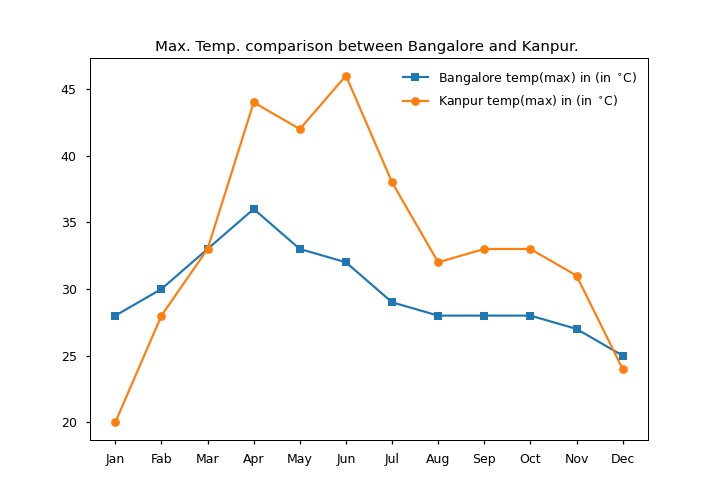

In [17]:
#Plotting to Visualise and observe 

x = df00.index.tolist()
#y1 = df00['maxtempC'].tolist()
y2 = df01['maxtempC'].tolist()
#y3 = df10['maxtempC'].tolist()
y4 = df11['maxtempC'].tolist()


plt.plot(x, y2, '-s', label = "Bangalore temp(max) in (in $\,^{\circ}\mathrm{C}$)")
plt.plot(x, y4, '-o', label = "Kanpur temp(max) in (in $\,^{\circ}\mathrm{C}$)")

plt.title('Max. Temp. comparison between Bangalore and Kanpur. ')

plt.legend(frameon=False)

plt.show();